Labo 4 ISD - Jonathan Friedli et Valentin Kaelin

# 1. Wine database

In [1]:
import numpy as np
from numpy import sqrt
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from math import *
from random import randrange, seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

### 1) 
Créez un notebook pour lire la base de données et générez un dataframe

In [2]:
filename = 'wine.data'
colnames=[
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline',
] 

df = pd.read_csv(filename, delimiter = ',', names=colnames, header=None)

# On met la colonne "Class" en dernière position du dataframe pour la faciliter la suite du labo
df = df[colnames[1:] + ['Class']]

df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


### 2) 
Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes).

In [3]:
print(df.count())
print("-----------------------------------")
print(df.dropna().count())

Alcohol                         178
Malic acid                      178
Ash                             178
Alcalinity of ash               178
Magnesium                       178
Total phenols                   178
Flavanoids                      178
Nonflavanoid phenols            178
Proanthocyanins                 178
Color intensity                 178
Hue                             178
OD280/OD315 of diluted wines    178
Proline                         178
Class                           178
dtype: int64
-----------------------------------
Alcohol                         178
Malic acid                      178
Ash                             178
Alcalinity of ash               178
Magnesium                       178
Total phenols                   178
Flavanoids                      178
Nonflavanoid phenols            178
Proanthocyanins                 178
Color intensity                 178
Hue                             178
OD280/OD315 of diluted wines    178
Proline        

On observe donc qu'il n'y a aucune donnée manquante comme les auteurs le précisaient dans le fichier ``wine.names``.

In [4]:
df.groupby('Class')['Class'].count()

Class
1    59
2    71
3    48
Name: Class, dtype: int64

In [5]:
print(df.columns)
print(len(df.columns))

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Class'],
      dtype='object')
14


### 3) 
Réaliser une analyse exploratoire de la base de données en utilisant des box plots et des scatter plots. Analysez s’il y a des variables avec très peu de variabilité et cherchez à identifier des variables qui ont des valeurs différentes pour les différentes classes.

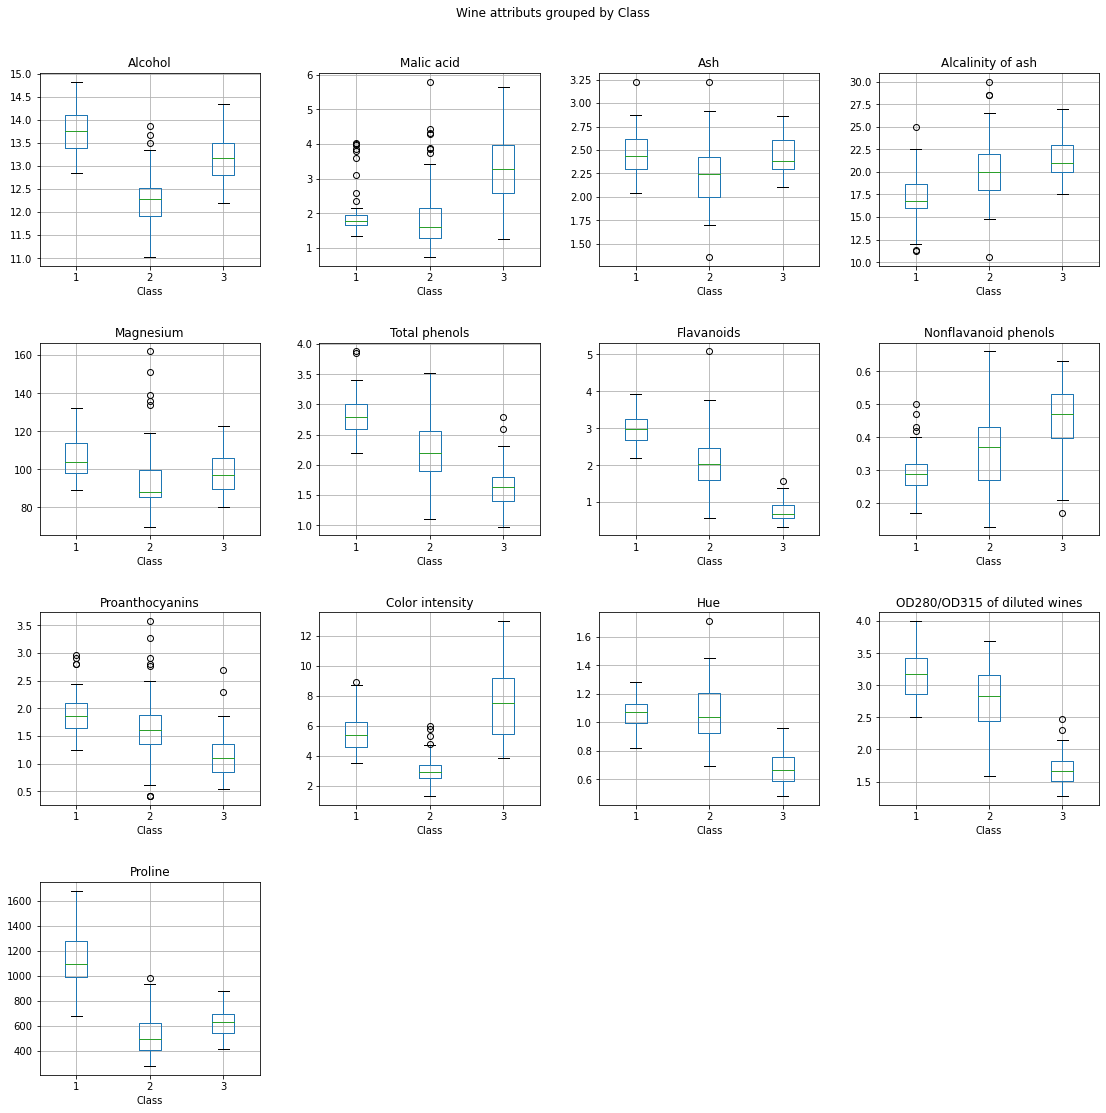

In [6]:
columns_to_show = df.columns[:-1]

fig, axes = plt.subplots(4, 4, sharex=False, sharey=False, figsize=(16, 16))
for col in range(16):
    if(col < len(columns_to_show)):
        df.boxplot(columns_to_show[col], by='Class', ax=axes[col // 4, col % 4])
    else:
        fig.delaxes(axes[col // 4, col % 4])
    
fig.suptitle('Wine attributs grouped by Class')
plt.tight_layout(pad=3)

* Variables avec très peu de variabilité: Ash, Magnesium

* Variables qui ont des valeurs différentes pour les différentes classes: Flavanoids, Total phenols, Alcohol, Color Intensity

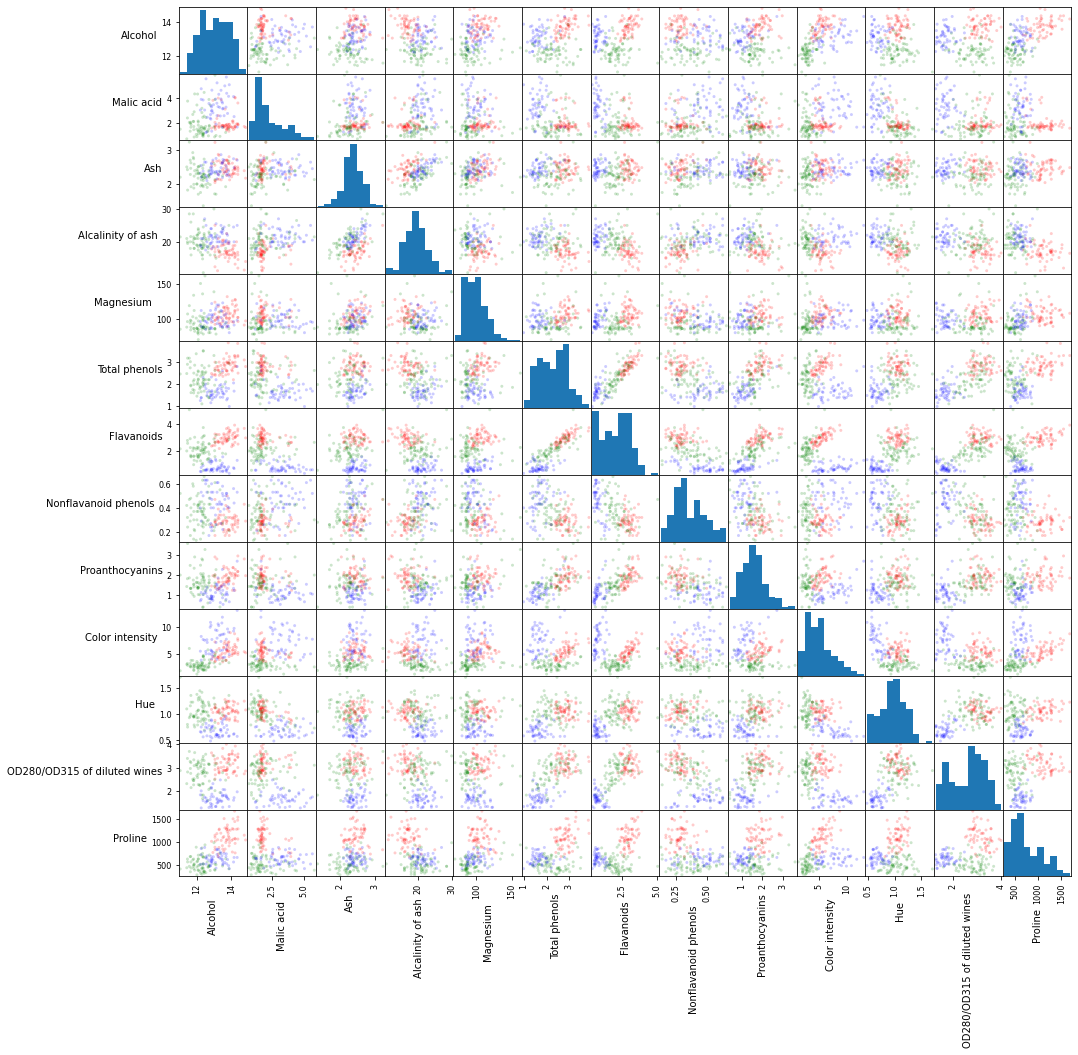

In [7]:
without_class = df.drop('Class', 1)
colors = np.array(59*['r']+71*['g']+48*['b'])
axes = pd.plotting.scatter_matrix(without_class, alpha=0.2, figsize=(16,16), color=colors)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# 2. Modèle à base de règles

Utilisez les box-plots des variables qui ont une majorité de valeurs différentes pour les différentes classes afin de programmer des règles (if-then-else) permettant la classification de chaque observation.   
**a)** Essayez au moins trois variables de manière individuelle et   
**b)** deux classificateurs à multiples variables (p.ex., deux ou trois) et évaluez le nombre d’observations qui sont correctement classées (accuracy) par ses modèles.

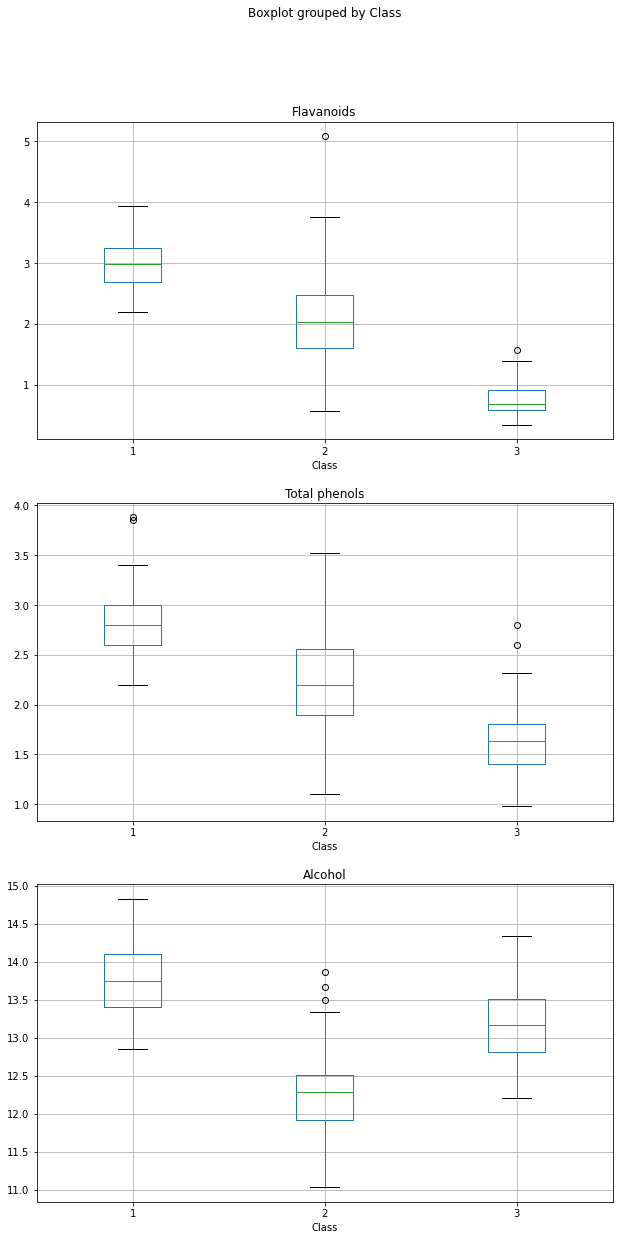

In [8]:
column_names = ['Flavanoids', 'Total phenols', 'Alcohol']
columns_to_show = df.filter(items=column_names).columns

fig, ax = plt.subplots(len(columns_to_show), figsize=(10, 20))
plt.suptitle('')

for i in range(len(columns_to_show)):
    df.boxplot(column=[columns_to_show[i]], by='Class', ax=ax[i])

In [9]:
column_names = ['Flavanoids', 'Total phenols', 'Alcohol', 'Class']

print(df.filter(items=column_names).groupby('Class').describe())

# Conditions Flavanoids:
def classify_by_flavanoids(row):
    flav = row['Flavanoids']
    if(flav < 1.2625):
        return 3
    elif (flav < 2.5775):
        return 2
    else:
        return 1
    
# Conditions Total phenols:
def classify_by_phenols(row):
    phenols = row['Total phenols']
    if(phenols < 1.835):
        return 3
    elif (phenols < 2.58):
        return 2
    else:
        return 1

# Conditions Alcohol :
def classify_by_alcohol(row):
    alcohol = row['Alcohol']
    if(alcohol < 12.805):
        return 2
    elif (alcohol < 13.4525):
        return 3
    else:
        return 1

      Flavanoids                                                       \
           count      mean       std   min    25%    50%    75%   max   
Class                                                                   
1           59.0  2.982373  0.397494  2.19  2.680  2.980  3.245  3.93   
2           71.0  2.080845  0.705701  0.57  1.605  2.030  2.475  5.08   
3           48.0  0.781458  0.293504  0.34  0.580  0.685  0.920  1.57   

      Total phenols            ...               Alcohol                       \
              count      mean  ...     75%   max   count       mean       std   
Class                          ...                                              
1              59.0  2.840169  ...  3.0000  3.88    59.0  13.744746  0.462125   
2              71.0  2.258873  ...  2.5600  3.52    71.0  12.278732  0.537964   
3              48.0  1.678750  ...  1.8075  2.80    48.0  13.153750  0.530241   

                                             
         min     25%     50%

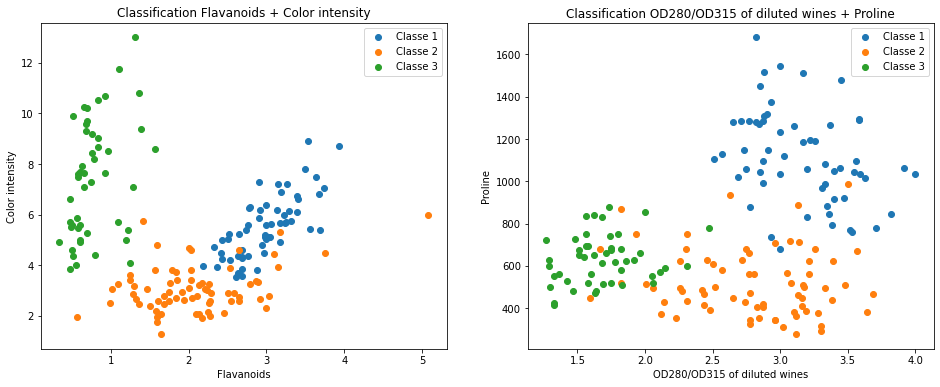

In [10]:
class_1 = df.loc[df['Class'] == 1]
class_2 = df.loc[df['Class'] == 2]
class_3 = df.loc[df['Class'] == 3]

fig, axs = plt.subplots(1, 2, sharey=False, figsize=(16, 6))
axs[0].scatter(class_1['Flavanoids'], class_1['Color intensity'], label="Classe 1")
axs[0].scatter(class_2['Flavanoids'], class_2['Color intensity'], label="Classe 2")
axs[0].scatter(class_3['Flavanoids'], class_3['Color intensity'], label="Classe 3")

axs[0].set_xlabel('Flavanoids')
axs[0].set_ylabel('Color intensity')
axs[0].set_title('Classification Flavanoids + Color intensity')
axs[0].legend()

axs[1].scatter(class_1['OD280/OD315 of diluted wines'], class_1['Proline'], label="Classe 1")
axs[1].scatter(class_2['OD280/OD315 of diluted wines'], class_2['Proline'], label="Classe 2")
axs[1].scatter(class_3['OD280/OD315 of diluted wines'], class_3['Proline'], label="Classe 3")

axs[1].set_xlabel('OD280/OD315 of diluted wines')
axs[1].set_ylabel('Proline')
axs[1].set_title('Classification OD280/OD315 of diluted wines + Proline')
axs[1].legend()

In [11]:
# b) Classificateurs à multiples variables:

# 1) Flavanoids + Color intensity
def classify_by_flavanoids_and_color_intensity(row):
    flav = row['Flavanoids']
    color = row['Color intensity']
    if(flav < 1.5 and color > 3.8):
        return 3
    elif(flav > 2.1 and color > 3.5):
        return 1
    else:
        return 2

# 2) OD280/OD315 of diluted wines + Proline
def classify_by_od280_and_proline(row):
    od280 = row['OD280/OD315 of diluted wines']
    proline = row['Proline']
    if(od280 < 2.2 and proline > 400):
        return 3
    elif(od280 > 2.4 and proline > 730):
        return 1
    else:
        return 2

In [12]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def accuracy_of_variable(fonctionname):
    predicted = []
    for i in range(178):
        predicted.append(globals()['classify_by_' + fonctionname](df.loc[i]))
    
    accuracy = accuracy_metric(df['Class'], predicted)
    return round(accuracy, 2)

print(f'Accuracy Flavanoids: {accuracy_of_variable("flavanoids")}%')
print(f'Accuracy Total phenols: {accuracy_of_variable("phenols")}%')
print(f'Accuracy Alcohol: {accuracy_of_variable("alcohol")}%\n')

print(f'Accuracy Flavanoids + Color intensity: {accuracy_of_variable("flavanoids_and_color_intensity")}%')
print(f'Accuracy OD280/OD315 of diluted wines + Proline: {accuracy_of_variable("od280_and_proline")}%')

Accuracy Flavanoids: 80.34%
Accuracy Total phenols: 69.1%
Accuracy Alcohol: 70.79%

Accuracy Flavanoids + Color intensity: 94.94%
Accuracy OD280/OD315 of diluted wines + Proline: 92.13%


On observe que l'accuracy avec 2 variables bien choisies (exemple: Flavonoids et Color Intensity) est déjà très bonne.  
En effet, il est facile de faire de bonnes règles avec les scatter plots de ces variables. 

Les valeurs utilisées dans les différentes règles à 1 variable ont été choisies en testant de nombreuses valeurs entre le 3ème quartile de la classe inférieure et le 1er de la classe supérieure.

# 3. L’algorithme des k plus proches voisins (k-NN)

Adaptez le code de k-NN vu en classe pour traiter le problème de classification des vins et testez la performance (accuracy) des modèles pour K=1,2,3,5,7,10. 

Utilisez la méthode de validation hold-out (calculez la moyenne de performances en répétant le « split » 10 fois) et la validation croisée avec n_folds=5. 

Présentez un résumé de vos résultats (c.a.d., un tableau avec les résultats ainsi qu’un plot ou bar chart) et commentez ceux-ci.

In [13]:
seed(42)

# Normaliser les données
min_max_scaler = MinMaxScaler()
dataset = df.copy(deep=True)
dataset.iloc[:,0:-1] = min_max_scaler.fit_transform(df.iloc[:,0:-1].to_numpy())

def split_test_set(dataset, ratio):
    test_set_split = list()
    copy = list(dataset)
    test_size = int(len(dataset) * ratio)
    while len(test_set_split) < test_size:
        i = randrange(len(copy))
        test_set_split.append(copy.pop(i))
    return test_set_split, copy

# On garde 1/4 des données pour la validation finale
wine_test, wine_train_validation = split_test_set(dataset.values.tolist(), 0.25)

In [14]:
# a) hold out (split = 10)

seed(42)

# Distance euclidienne
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Localisation des voisins
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Calcul des prédictions
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# Calcul de précision
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Préparation des données pour évaluation
def train_test_split(dataset, split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

# Préparation pour KNN
K = [1, 2, 3, 5, 7, 10]
n_splits = 10
accuracies = {}
for k in K:
    accuracies[k] = []

# Utilisation de KNN
for k in K:
    accuracy = []
    for f in range(n_splits):
        predictions = []
        train_set, dataset_copy = train_test_split(wine_train_validation, 0.6)
        for j in range(len(dataset_copy)):
            predictions.append(predict_classification(train_set, dataset_copy[j], k))
        actual = [row[-1] for row in dataset_copy]
        accuracy.append(accuracy_metric(actual, predictions))
    accuracies[k].append((np.mean(accuracy)))

df_accuracies_hold = pd.DataFrame(accuracies)
print("Accuracy KNN - Hold out:\n")
print(df_accuracies_hold)
print(f'Mean Accuracy: {round(df_accuracies_hold.values.mean(), 3)}%')

Accuracy KNN - Hold out:

          1          2         3          5          7          10
0  93.207547  94.150943  95.09434  94.150943  95.471698  95.849057
Mean Accuracy: 94.654%


In [15]:
# b) validation croisée (n_folds = 5)

seed(42)

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Evaluate an algorithm using a cross validation split
def evaluate_knn(dataset, n_folds, *args, **kwargs):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predictions = list()
        for row in test_set:
            output = predict_classification(train_set, row, *args)
            predictions.append(output)
        
        actual = [row[-1] for row in fold]
        # Affiche les matrices
        if('plot' in kwargs):
            cm = confusion_matrix(actual, predictions)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3])
            disp.plot(cmap='Blues')
        accuracy = accuracy_metric(actual, predictions)
        scores.append(accuracy)
    return scores

n_folds = 5
K = [1, 2, 3, 5, 7, 10]
accuracies = {}
for k in K:
    accuracies[k] = []
    
for k in K:
    scores = evaluate_knn(wine_train_validation, n_folds, k)
    accuracies[k].append(np.mean(scores))
    
df_accuracies_cross = pd.DataFrame(accuracies)

print("Accuracy KNN - Cross Validation:\n")
print(df_accuracies_cross)
print(f'Mean Accuracy: {round(df_accuracies_cross.values.mean(), 3)}%')

Accuracy KNN - Cross Validation:

          1          2          3          5          7          10
0  93.076923  90.769231  93.846154  93.846154  95.384615  95.384615
Mean Accuracy: 93.718%


KNN - Hold out
          1          2         3          5          7          10
0  93.207547  94.150943  95.09434  94.150943  95.471698  95.849057

KNN - Cross Validation
          1          2          3          5          7          10
0  93.076923  90.769231  93.846154  93.846154  95.384615  95.384615


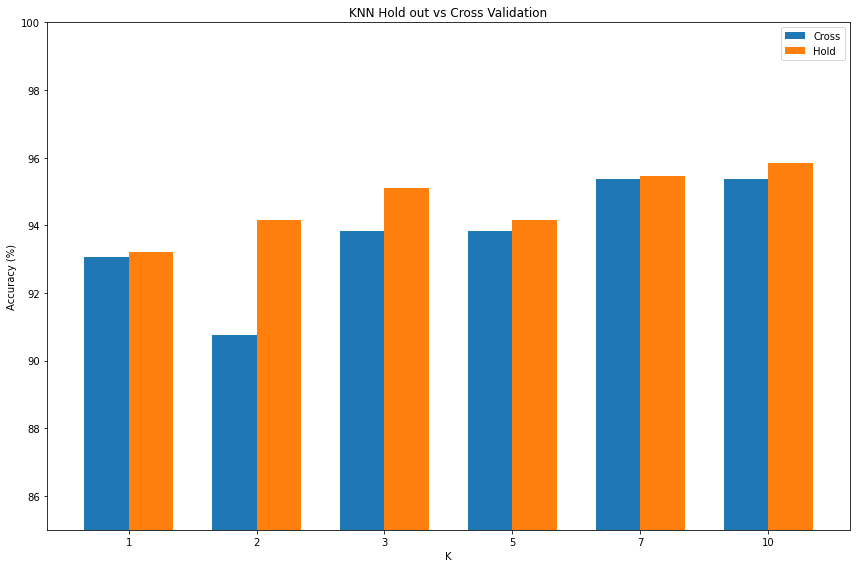

In [16]:
print("KNN - Hold out")
print(df_accuracies_hold)

print("\nKNN - Cross Validation")
print(df_accuracies_cross)

labels = K

x = np.arange(len(labels))
width = 0.35  # largeur des barres

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, df_accuracies_cross.values[0], width, label='Cross')
rects2 = ax.bar(x + width/2, df_accuracies_hold.values[0], width, label='Hold')

ax.set_ylim([85, 100])

ax.set_xlabel('K')
ax.set_ylabel('Accuracy (%)')
ax.set_title('KNN Hold out vs Cross Validation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

Tout d'abord, nous utilisons un seed pour ne pas que nos résultats changent à chaque nouvelle exécution du programme. En effet, à cause de l'utilisation de la méthode ``randrange()``, les partitions sont aléatoires et nos conclusions s'en trouveraient modifiées.

Nous observons que les résultats sont assez similaires peu importe le K choisi (toujours compris entre 90% et 96%). Le k le plus imposant (10) reste le plus précis mais il faut prendre en compte le nombre de calculs supplémentaires nécessaires. Si le temps de calcul est négligeable, il est le plus indiqué.

Dans le cas où le nombre de calculs est un facteur important, k = 3 semble être le meilleur compromis car ses résultats sont parmi les meilleurs.

Nous observons également que la méthode hold out est toujours légèrement plus efficace que via la validation croisée. Nous pensons que cela est dû à notre seed. En effet, la méthode hold out est plus aléatoire que la cross validation et donc dépend plus du seed. Il est donc tout à fait probable qu'un autre seed inverse la tendance et que nous ayons de meilleurs résultats avec la cross validation.

# 4. Évaluation des modèles

Utilisez la bibliothèque scikit-learn (sklearn.metrics) pour calculer la matrice de confusion du meilleur modèle trouvé précédemment (c.a.d., pour un K donné), sur l’ensemble de validation pour chaque « fold » de la validation croisée. 

Y a-t-il des classes pour lesquelles nous avons plus de peine à faire la bonne classification ? 

Meilleur K en validation croisée: 7
Mean Accuracy KNN: 95.385%


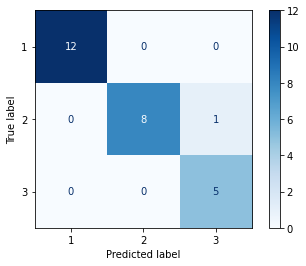

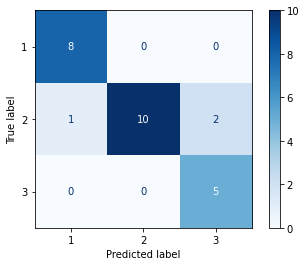

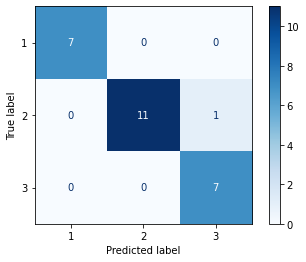

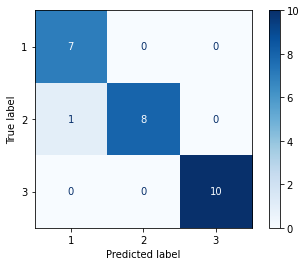

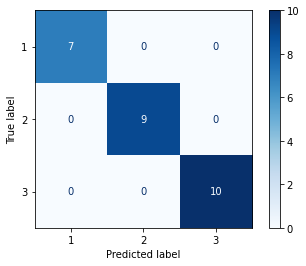

In [17]:
seed(42)

n_folds = 5

k = int(df_accuracies_cross.idxmax(1).values)
print(f'Meilleur K en validation croisée: {k}')

scores = evaluate_knn(wine_train_validation, n_folds, k, plot=True)
print(f'Mean Accuracy KNN: {round(np.mean(scores), 3)}%')

La classe 2 a un peu plus de peine à être classifiée que les 2 autres.  
En effet, sur les 6 valeurs mal classifiées, elle sont toutes de la classe 2.

Meilleur K en validation croisée: 7
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        16
         2.0       1.00      1.00      1.00        19
         3.0       1.00      1.00      1.00         9

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



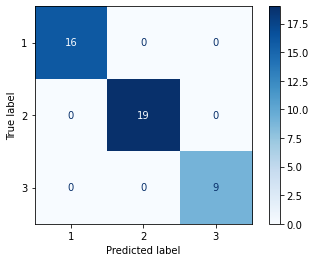

In [18]:
k = int(df_accuracies_cross.idxmax(1).values)
print(f'Meilleur K en validation croisée: {k}')

# On teste sur des valeurs qu'il n'a encore jamais vu (wine_test)
validation_prediction = list()
for row in wine_test:
    output = predict_classification(wine_train_validation, row, k)
    validation_prediction.append(output)
    
validation_set_truth = [col[-1] for col in wine_test]
report = classification_report(validation_set_truth, validation_prediction)
print(report)

cm = confusion_matrix(validation_set_truth, validation_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3])
disp.plot(cmap='Blues')

Lors de l'évaluation complète (avec des données que KNN n'a encore jamais vu), les résultats sont parfaits. Il faut quand même noter que ce résultat n'est pas toujours aussi bon. Avant d'avoir choisi un seed pour sélectionner 25% des données qui serviront au test final, ce résultat variait aux alentours de 97%, ce qui reste tout à fait honorable.

# 5. L’algorithme LVQ

Utilisez l’algorithme LVQ pour traiter le problème de classification des vins et testez la performance (accuracy) des modèles et calculez la matrice de confusion du meilleur modèle trouvé en explorant différentes valeurs de hyper-paramètres (c.a.d., nombre de prototypes, learning rate et nombre d’epochs), sur l’ensemble de validation pour chaque « fold » de la validation croisée.

Commentez vos résultats et comparez l’accuracy de ce modèle avec celle obtenu avec k-NN. 

Scores: [100.0, 100.0, 94.28571428571428, 94.28571428571428, 97.14285714285714]
Mean Accuracy LVQ Cross Validation: 97.143%


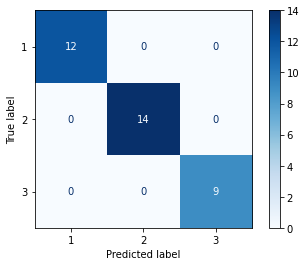

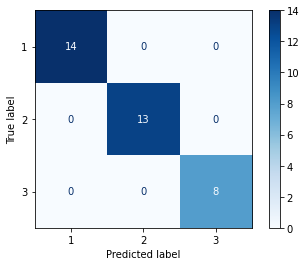

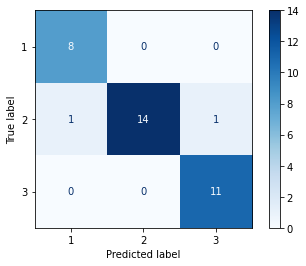

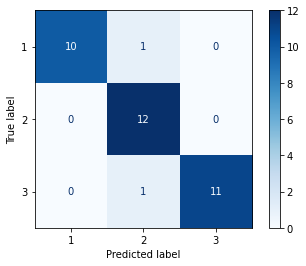

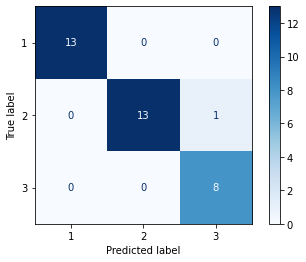

In [19]:
seed(42)

# Evaluate an algorithm using a cross validation split
def evaluate_lvq(dataset, algorithm, n_folds, *args, **kwargs):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        # Affiche les matrices
        if('plot' in kwargs):
            cm = confusion_matrix(actual, predicted)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3])
            disp.plot(cmap='Blues')
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Locate the best matching unit
def get_best_matching_unit(codebooks, test_row):
    distances = list()
    for codebook in codebooks:
        dist = euclidean_distance(codebook, test_row)
        distances.append((codebook, dist))
    distances.sort(key=lambda tup: tup[1])
    return distances[0][0]
 
# Make a prediction with codebook vectors
def predict(codebooks, test_row):
    bmu = get_best_matching_unit(codebooks, test_row)
    return bmu[-1]
 
# Create a random codebook vector
def random_codebook(train):
    n_records = len(train)
    n_features = len(train[0])
    codebook = [train[randrange(n_records)][i] for i in range(n_features)]
    return codebook

def train_codebooks(train, n_codebooks, lrate, epochs):
    codebooks = [random_codebook(train) for i in range(n_codebooks)]
    for epoch in range(epochs):
        rate = lrate * (1.0-(epoch/float(epochs)))
        for row in train:
            bmu = get_best_matching_unit(codebooks, row)
            for i in range(len(row)-1):
                error = row[i] - bmu[i]
                if bmu[-1] == row[-1]:
                    bmu[i] += rate * error
                else:
                    bmu[i] -= rate * error
    return codebooks

# LVQ Algorithm
def learning_vector_quantization(train, test, n_codebooks, lrate, epochs):
    codebooks = train_codebooks(train, n_codebooks, lrate, epochs)
    predictions = list()
    for row in test:
        output = predict(codebooks, row)
        predictions.append(output)
    return(predictions)

# Prepare data - Normaliser les données
min_max_scaler = MinMaxScaler()
dataset = df.copy(deep=True)
dataset.iloc[:,0:-1] = min_max_scaler.fit_transform(df.iloc[:,0:-1].to_numpy())
#print(dataset)

# Evaluate algorithm
n_folds = 5
learn_rate = 0.3
n_epochs = 10
n_codebooks = 15
scores = evaluate_lvq(dataset.values.tolist(), learning_vector_quantization, n_folds, n_codebooks, learn_rate, n_epochs, plot=True)
codebook = train_codebooks(dataset.values.tolist(), n_codebooks, learn_rate, n_epochs)

print('Scores: %s' % scores)
print('Mean Accuracy LVQ Cross Validation: %.3f%%' % (sum(scores)/float(len(scores))))

Les classes mal classifiées sont plus variées que pour KNN. En effet, 3 cas sur 5 sont de la classe 2, 1 cas sur la classe 1 et le dernier sur la classe 3.

L'accuracy moyenne est quant à elle légérement supérieure à KNN (97.143% vs 95.385%).

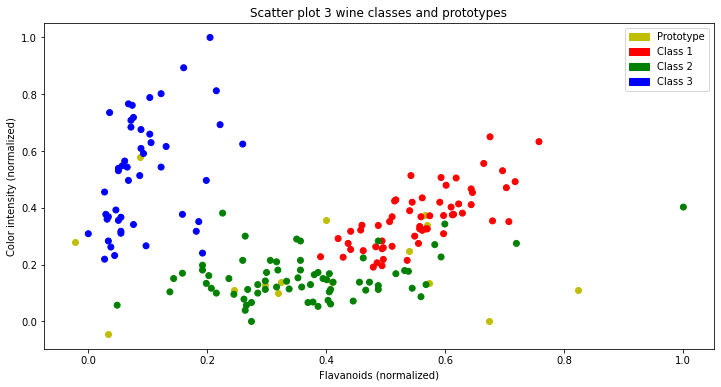

In [20]:
colors = ['r','g','b']

# Flavanoids (index: 6) + Color intensity (index: 9)

prototype_patch = mpatches.Patch(color='y', label='Prototype')
class_1_patch = mpatches.Patch(color='r', label='Class 1')
class_2_patch = mpatches.Patch(color='g', label='Class 2')
class_3_patch = mpatches.Patch(color='b', label='Class 3')

plt.figure(figsize=(12, 6))
plt.scatter([i[6] for i in codebook],[j[9] for j in codebook], c='y')
plt.scatter([i[6] for i in dataset.values.tolist()], [j[9] for j in dataset.values.tolist()], c=[colors[round(k[-1]) - 1] for k in dataset.values.tolist()])

plt.title("Scatter plot 3 wine classes and prototypes")
plt.xlabel("Flavanoids (normalized)")
plt.ylabel("Color intensity (normalized)")
plt.legend(handles=[prototype_patch, class_1_patch, class_2_patch, class_3_patch])

In [21]:
predicted_classes = list()

for row in wine_test:
    output = predict(codebook, row)
    predicted_classes.append(output)
    
actual_classes = [row[-1] for row in wine_test]
accuracy = accuracy_metric(actual_classes, predicted_classes)
print(f'Mean Accuracy LVQ: {round(accuracy, 3)}%')

Mean Accuracy LVQ: 100.0%


L'accuracy finale est, comme pour KNN, de 100%. Encore une fois, ce résultat dépend du seed utilisé lors de la séparation des données. Cependant, cela indique bien que l'algorithme est très efficace.

Pour comparer KNN et LVQ, les deux algorithmes sont dans notre cas très performants. On donne quand même un léger avantage à LVQ qui a une meilleur accuracy moyenne lors de la cross validation (97.143% vs 95.385%).